In [7]:

import random
from collections import Counter
import matplotlib.pyplot as plt
from typing import List

In [49]:
num_friends = [
    random.choice(range(10)) for _ in range(204)
]

In [9]:
num_points = len(num_friends)

In [10]:
num_points

204

In [11]:
friend_count = Counter(num_friends)

In [12]:
xs = range(101)

In [13]:
ys = [friend_count[x] for x in xs]

Text(0, 0.5, '# of people')

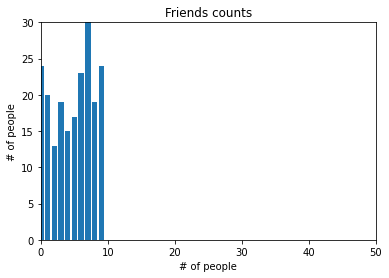

In [50]:
plt.bar(xs, ys)
plt.axis([0,50, 0, 30])
plt.title('Friends counts')
plt.xlabel('# of people')
plt.ylabel('# of people')

In [15]:
#number of points
num_points = len(num_friends)

In [16]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [17]:
sorted_value = sorted(num_friends)
smallestValue = sorted_value[0]
second_smallest_value = sorted_value[1]
second_largest_value = sorted_value[-2]

In [18]:
#central tendencies
#mean (average)
def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

In [19]:
mean(num_friends)

4.7254901960784315

In [20]:
%%typecheck

from typing import List
#median for odd and even
def _median_odd(xs: List[float]):
    return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint -1]+ sorted_xs[hi_midpoint])/2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

Success: no issues found in 1 source file



In [21]:
assert median([1,10,2,9,5]) == 5
assert median ([1,9,2,10]) == (2 + 9) / 2

print('median is:\n',median(num_friends))
print('mean is:\n', mean(num_friends))

median is:
 5.0
mean is:
 4.7254901960784315


In [22]:
#quantile 

def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 2
assert quantile(num_friends, 0.75) == 7

AssertionError: 

In [ ]:
#mode most common values 

def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    print(max_count)
    return [x_i
            for x_i, count in counts.items()
            if count == max_count
           ]

In [ ]:
assert set(mode(num_friends)) == {8}, 'wrong value'

#Dispersion

In [25]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)
    
print('Range is')
print(data_range([33,45,6,4]))

Range is
41


In [40]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))
    
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

In [41]:
#variance 
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, 'variance requires at least two elements'
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

8.919347049164493

In [42]:
import math

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

2.9865275905580537

In [44]:
#iqr
def iqr(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

iqr(num_friends)

5

#Correlation